In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ai_job_market_insights.csv')
df

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable


In [3]:
df.columns

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')

In [4]:
df.columns

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')

In [5]:
df.Job_Title.unique()      # 10 different Professions related to IT - industry

array(['Cybersecurity Analyst', 'Marketing Specialist', 'AI Researcher',
       'Sales Manager', 'UX Designer', 'HR Manager', 'Product Manager',
       'Software Engineer', 'Data Scientist', 'Operations Manager'],
      dtype=object)

In [6]:
df.Industry.unique()      # 10 different sectors

array(['Entertainment', 'Technology', 'Retail', 'Education', 'Finance',
       'Transportation', 'Telecommunications', 'Manufacturing',
       'Healthcare', 'Energy'], dtype=object)

In [7]:
df.Location.unique()    # 10 different locations

array(['Dubai', 'Singapore', 'Berlin', 'Tokyo', 'San Francisco', 'London',
       'Paris', 'Sydney', 'New York', 'Toronto'], dtype=object)

In [8]:
df.Required_Skills.unique()    # 10 different skils

array(['UX/UI Design', 'Marketing', 'Project Management', 'JavaScript',
       'Cybersecurity', 'Sales', 'Machine Learning', 'Python',
       'Data Analysis', 'Communication'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [10]:
df.describe(include = 'O')

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Remote_Friendly,Job_Growth_Projection
count,500,500,500,500,500,500,500,500,500
unique,10,10,3,10,3,3,10,2,3
top,Data Scientist,Manufacturing,Small,San Francisco,Medium,Medium,Project Management,Yes,Growth
freq,62,58,171,62,179,173,60,251,169


In [11]:
df.isnull().sum()

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

## Visualization

In [12]:
df['Job_Title'].value_counts().sort_values(ascending = False)

Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

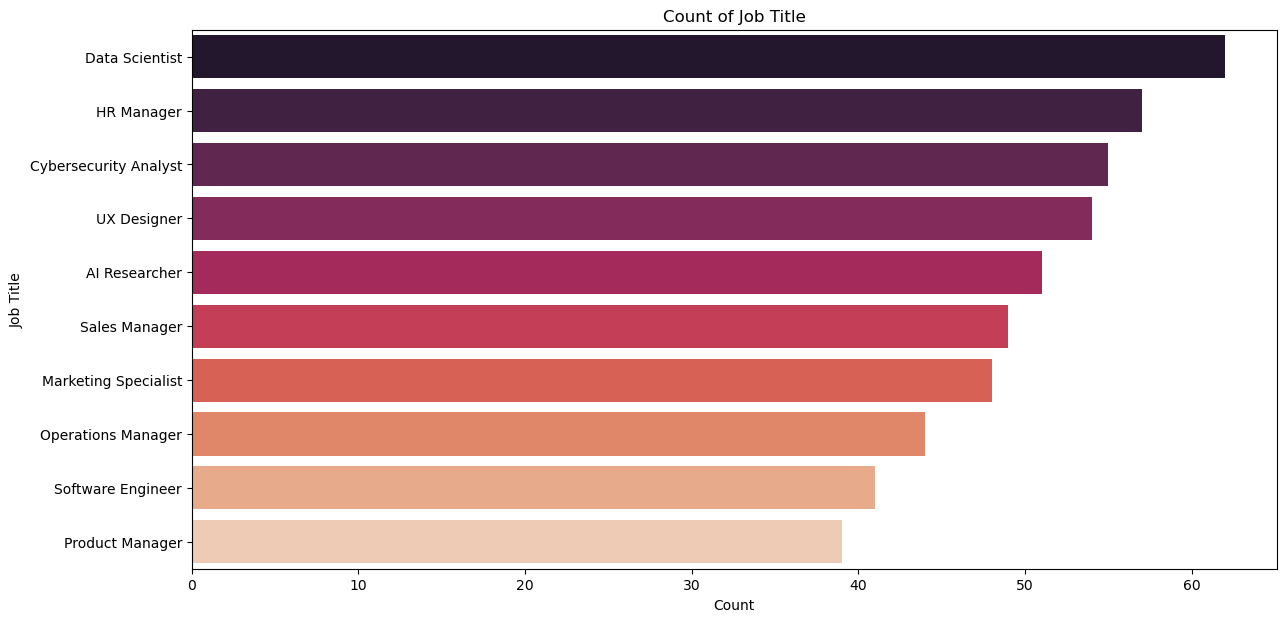

In [13]:
plt.figure(figsize = (14,7))
sns.countplot(y = 'Job_Title', data = df, order = df['Job_Title'].value_counts().index, palette = 'rocket')
plt.title('Count of Job Title')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

In [14]:
df.Industry.value_counts().sort_values(ascending=False)

Industry
Manufacturing         58
Education             57
Technology            56
Finance               53
Telecommunications    53
Energy                49
Entertainment         47
Retail                46
Healthcare            42
Transportation        39
Name: count, dtype: int64

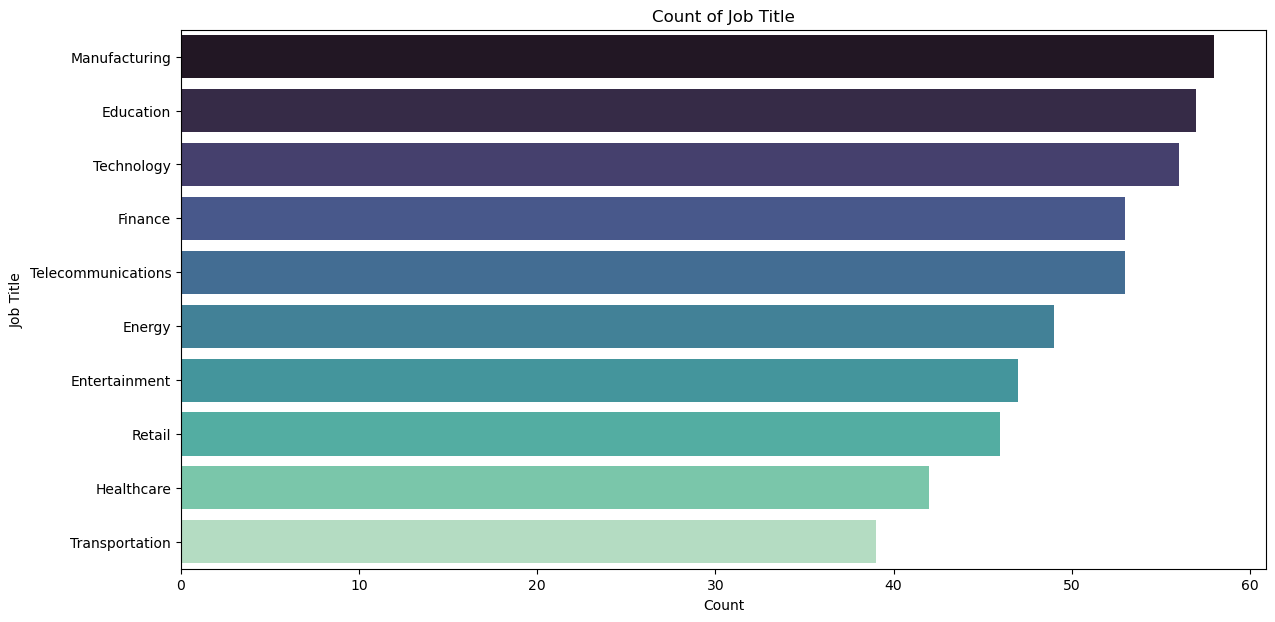

In [15]:
plt.figure(figsize = (14,7))
sns.countplot(y = 'Industry', data = df, order = df['Industry'].value_counts().index, palette = 'mako')
plt.title('Count of Job Title')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

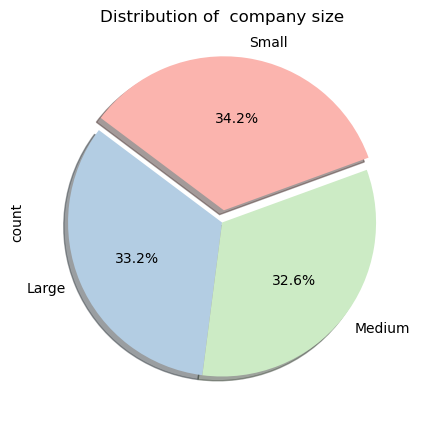

In [16]:
colors = plt.get_cmap('Pastel1').colors
df["Company_Size"].value_counts().plot(kind='pie', startangle=20 ,autopct='%1.1f%%', figsize=(5,5), title='Distribution of  company size', explode=(0.08,0,0 ) , shadow=True , colors=colors)
plt.show()


In [17]:
df.groupby("Company_Size")["Job_Title"].value_counts().unstack()

Job_Title,AI Researcher,Cybersecurity Analyst,Data Scientist,HR Manager,Marketing Specialist,Operations Manager,Product Manager,Sales Manager,Software Engineer,UX Designer
Company_Size,,,,,,,,,,
Large,16,20,23,20,15,13,16,16,12,15
Medium,21,16,17,20,20,12,11,16,13,17
Small,14,19,22,17,13,19,12,17,16,22


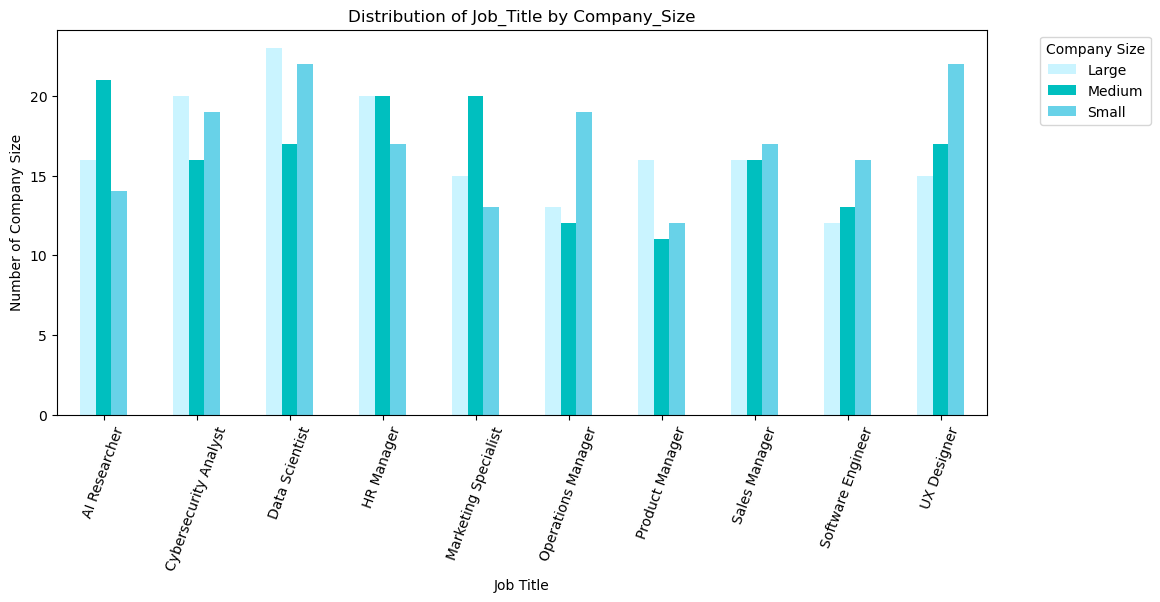

In [18]:
subject_counts = df.groupby(["Job_Title", "Company_Size"]).size().unstack()

palette = sns.color_palette("Pastel1")
subject_counts.plot(kind='bar', figsize=(12, 5), color=["#CAF4FF" ,"c"  ,"#68D2E8"])

plt.title('Distribution of Job_Title by Company_Size')
plt.xlabel('Job Title')
plt.ylabel('Number of Company Size')
plt.xticks(rotation=70)
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

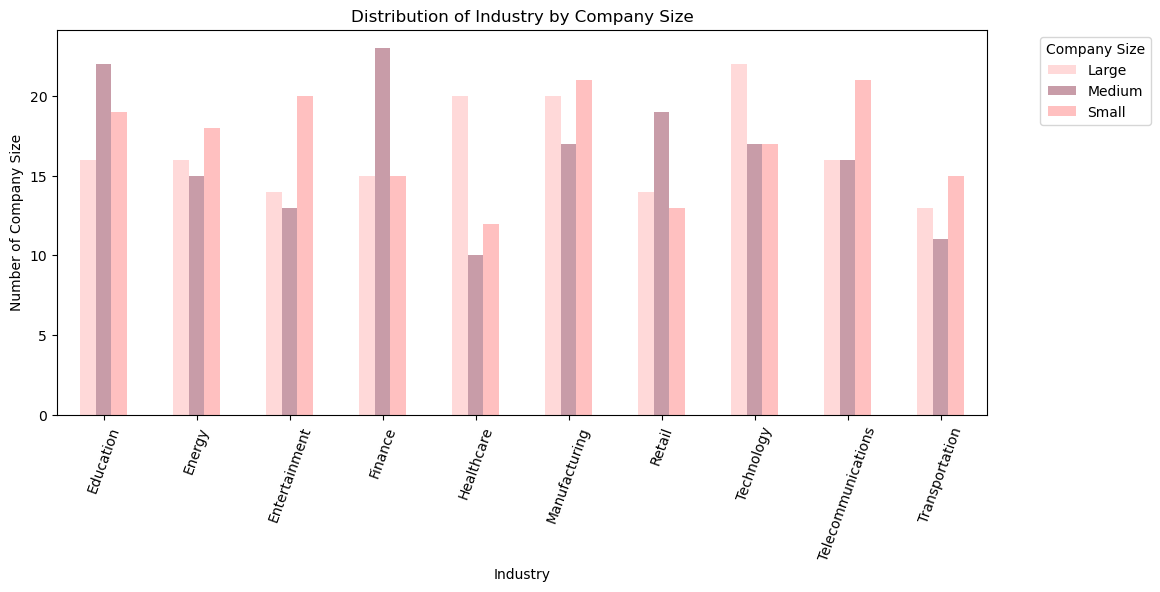

In [19]:
subject_counts = df.groupby(["Industry", "Company_Size"]).size().unstack()

palette = sns.color_palette("Set1")
subject_counts.plot(kind='bar', figsize=(12, 5), color=["#FFD0D0", "#BB8493", "#FFB1B1"] ,alpha=0.8)

plt.title('Distribution of Industry by Company Size')
plt.xlabel('Industry')
plt.ylabel('Number of Company Size')
plt.xticks(rotation=70)
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [20]:
df.groupby("Job_Title")["Location"].value_counts().unstack()

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Job_Title,,,,,,,,,,
AI Researcher,2,3,3,6,2,10,8,5,5,7
Cybersecurity Analyst,7,9,8,6,4,4,3,7,3,4
Data Scientist,7,6,5,8,4,6,5,8,8,5
HR Manager,5,4,8,6,8,7,6,3,5,5
Marketing Specialist,6,5,4,2,6,9,6,3,6,1
Operations Manager,7,6,5,4,2,7,4,4,4,1
Product Manager,4,2,3,2,4,6,3,5,5,5
Sales Manager,5,3,6,3,5,5,7,5,3,7
Software Engineer,2,5,3,5,4,3,6,6,5,2


In [21]:
df.groupby("Industry")["Location"].value_counts().unstack()

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Industry,,,,,,,,,,
Education,6,4,6,7,5,6,6,5,7,5
Energy,6,5,3,6,3,6,9,4,3,4
Entertainment,6,3,3,5,4,3,9,5,7,2
Finance,1,4,4,3,5,12,6,3,8,7
Healthcare,5,7,4,1,9,4,2,6,3,1
Manufacturing,4,5,8,7,8,6,4,8,6,2
Retail,5,5,4,5,2,6,3,7,5,4
Technology,5,5,5,6,4,8,7,5,5,6
Telecommunications,8,7,6,7,1,5,3,6,5,5


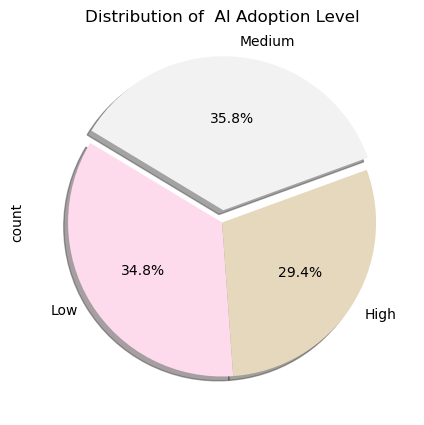

In [22]:
colors = plt.get_cmap('Pastel1_r').colors
df["AI_Adoption_Level"].value_counts().plot(kind='pie', startangle=20 ,autopct='%1.1f%%', figsize=(5,5), title='Distribution of  AI Adoption Level', explode=(0.08,0,0 ) , shadow=True , colors=colors)
plt.show()

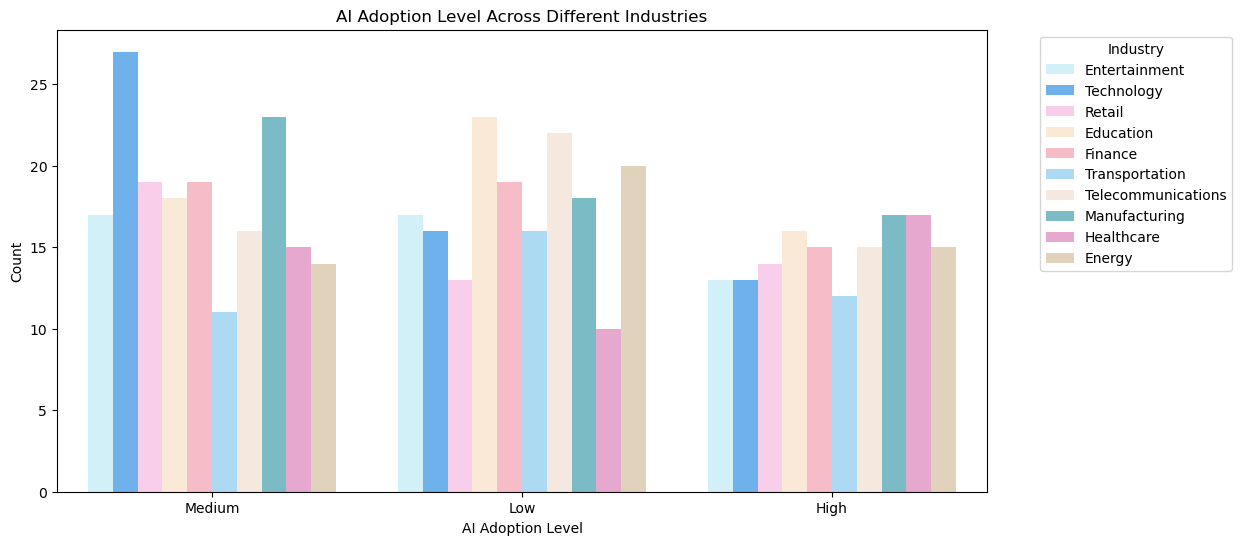

In [23]:
colors = ["#CAF4FF", "#5AB2FF","#FFC7ED" ,"#FFE9D0" ,"#FFB4C2","#A0DEFF" ,"#F7E7DC" ,"#6DC5D1" ,"#F19ED2","#E7D4B5"]

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AI_Adoption_Level', hue='Industry', palette=colors)
plt.title('AI Adoption Level Across Different Industries')
plt.xlabel('AI Adoption Level')
plt.ylabel('Count')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

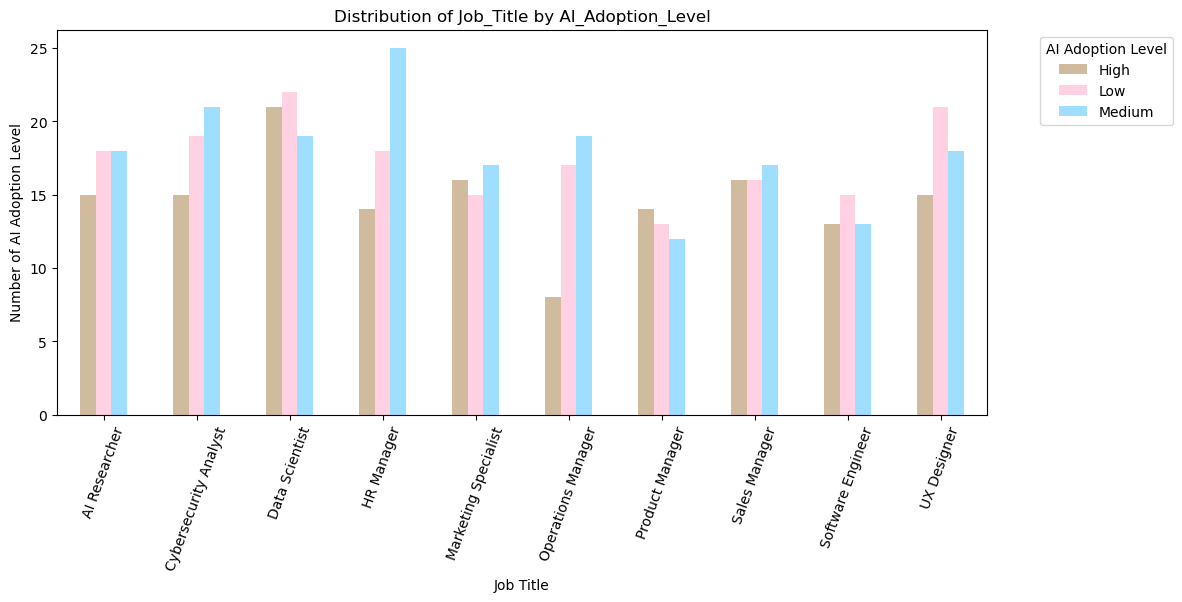

In [24]:
subject_counts = df.groupby(["Job_Title", "AI_Adoption_Level"]).size().unstack()

palette = sns.color_palette("Pastel1")
subject_counts.plot(kind='bar', figsize=(12, 5), color=[ "#D1BB9E", "#FFD1E3", "#A0DEFF"])

plt.title('Distribution of Job_Title by AI_Adoption_Level')
plt.xlabel('Job Title')
plt.ylabel('Number of AI Adoption Level')
plt.xticks(rotation=70)
plt.legend(title='AI Adoption Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

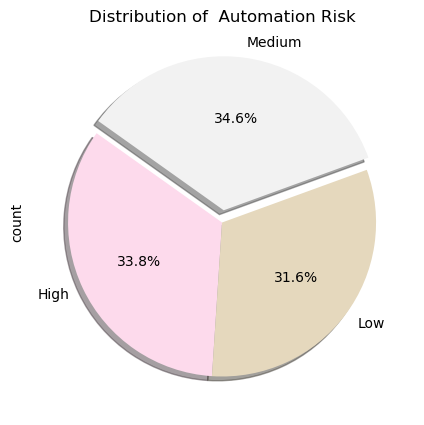

In [25]:
colors = plt.get_cmap('Pastel1_r').colors
df["Automation_Risk"].value_counts().plot(kind='pie', startangle=20 ,autopct='%1.1f%%', figsize=(5,5), title='Distribution of  Automation Risk', explode=(0.08,0,0 ) , shadow=True , colors=colors)
plt.show()

In [26]:
df.groupby(["Automation_Risk", "Job_Title"]).size().unstack()

Job_Title,AI Researcher,Cybersecurity Analyst,Data Scientist,HR Manager,Marketing Specialist,Operations Manager,Product Manager,Sales Manager,Software Engineer,UX Designer
Automation_Risk,,,,,,,,,,
High,20,23,17,15,17,10,16,20,15,16
Low,15,21,25,16,10,18,12,18,13,10
Medium,16,11,20,26,21,16,11,11,13,28


In [27]:
df.groupby(["Automation_Risk", "Industry"]).size().unstack()

Industry,Education,Energy,Entertainment,Finance,Healthcare,Manufacturing,Retail,Technology,Telecommunications,Transportation
Automation_Risk,,,,,,,,,,
High,22,17,18,17,11,19,11,17,18,19
Low,16,18,17,16,14,16,16,17,17,11
Medium,19,14,12,20,17,23,19,22,18,9


In [28]:
df.groupby(["Automation_Risk", "Location"]).size().unstack()

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Automation_Risk,,,,,,,,,,
High,12,14,20,17,12,24,23,17,15,15
Low,16,20,17,10,16,17,12,20,15,15
Medium,20,17,9,22,18,21,19,15,21,11


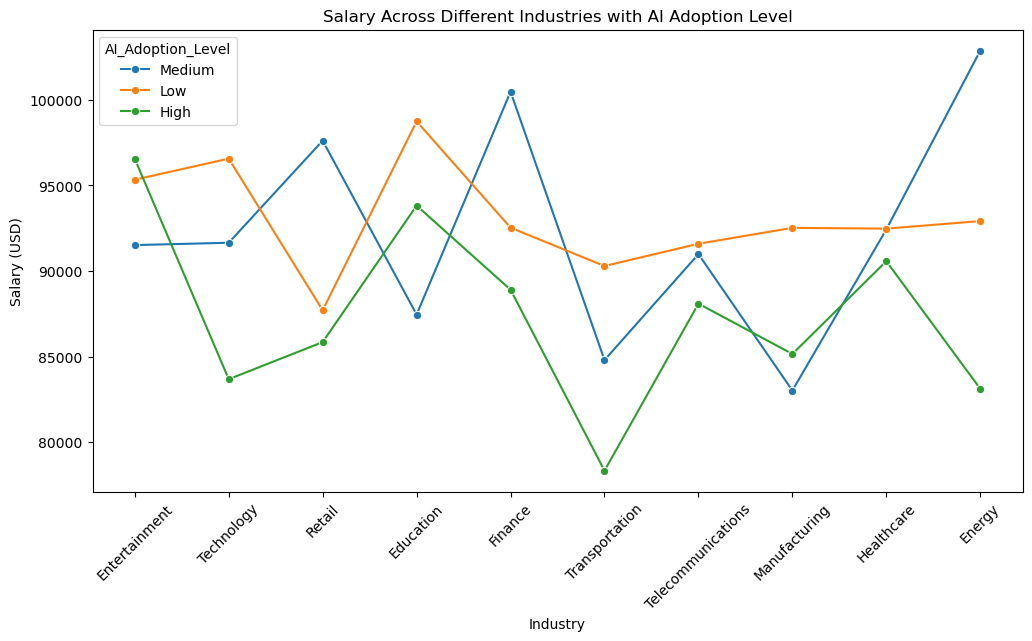

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Industry', y='Salary_USD', hue='AI_Adoption_Level', marker='o' , ci=None)
plt.title('Salary Across Different Industries with AI Adoption Level')
plt.xlabel('Industry')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.show()

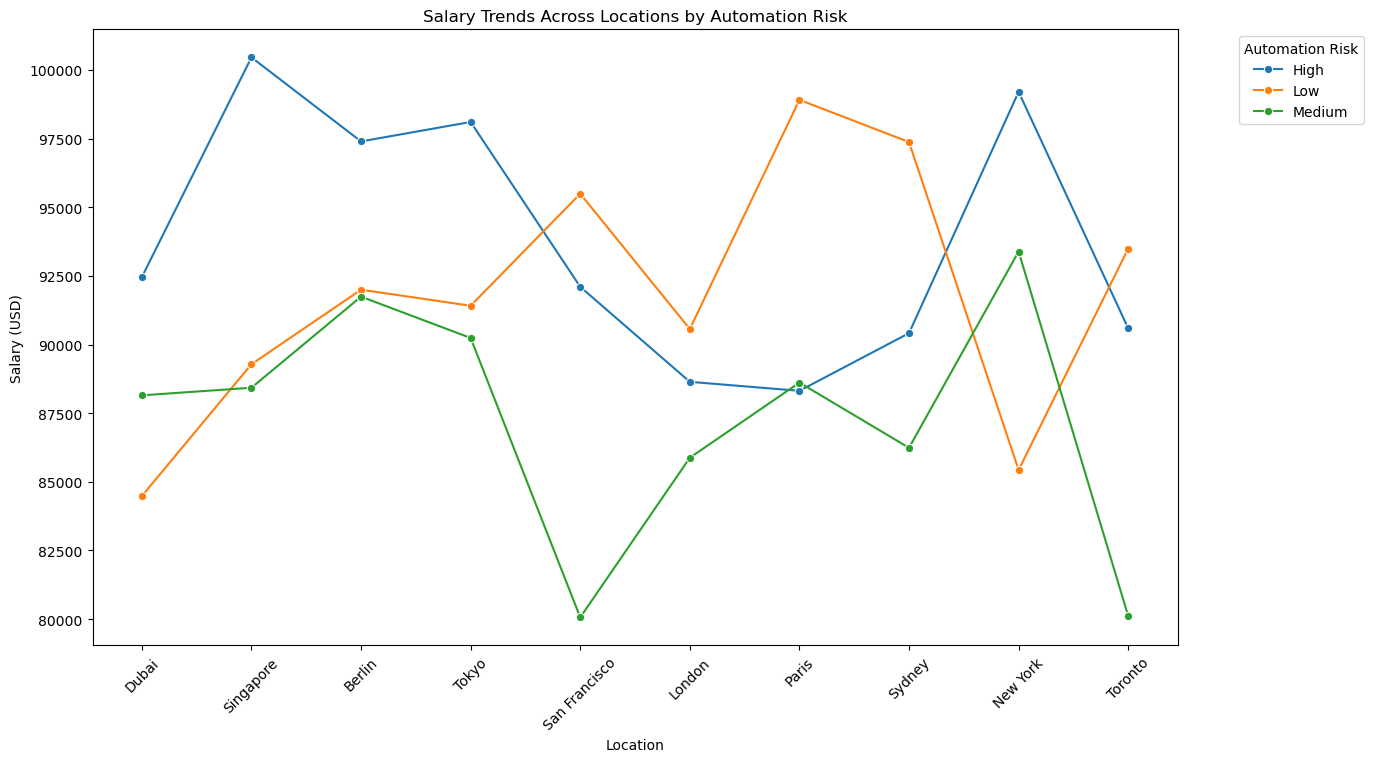

In [30]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Location', y='Salary_USD', hue='Automation_Risk', marker='o', ci=None)
plt.title('Salary Trends Across Locations by Automation Risk')
plt.xlabel('Location')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.legend(title='Automation Risk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

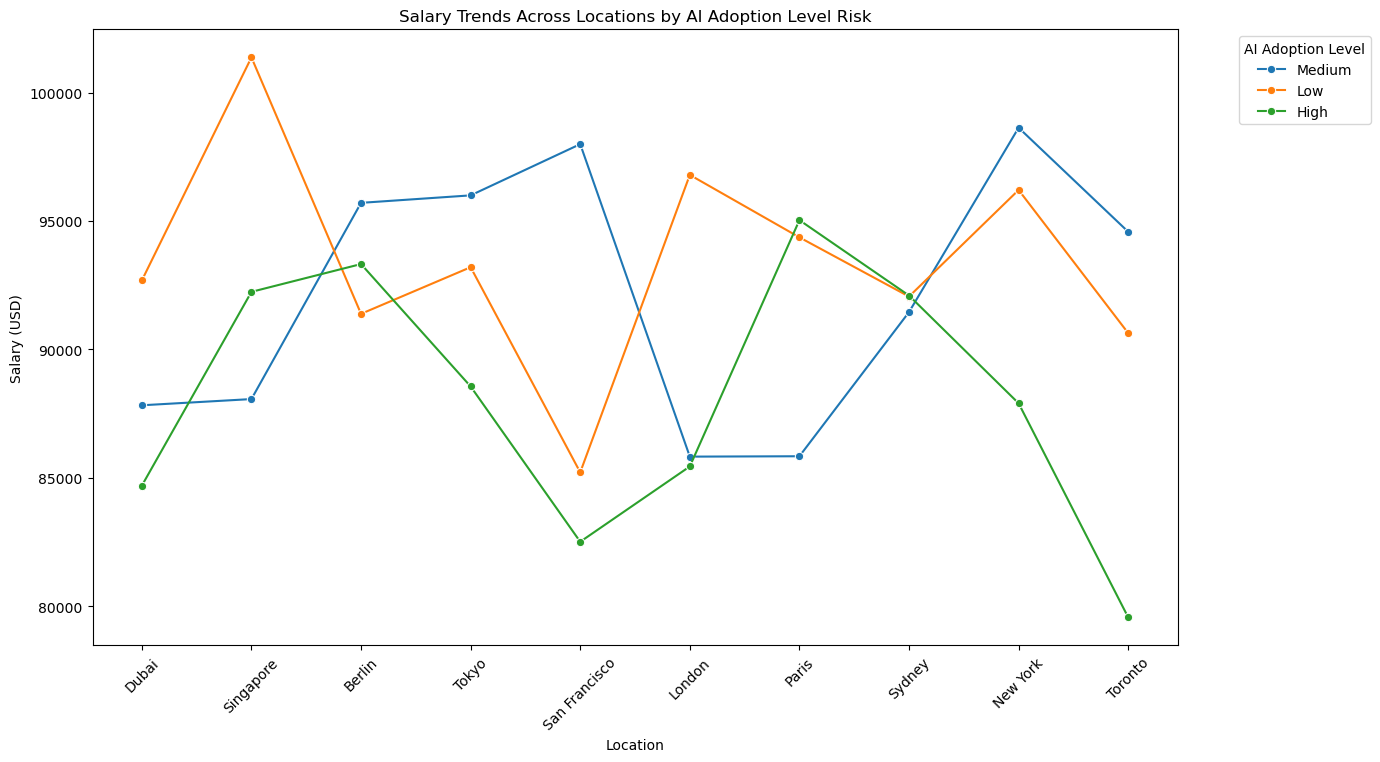

In [31]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Location', y='Salary_USD', hue='AI_Adoption_Level', marker='o', ci=None)
plt.title('Salary Trends Across Locations by AI Adoption Level Risk')
plt.xlabel('Location')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.legend(title='AI Adoption Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

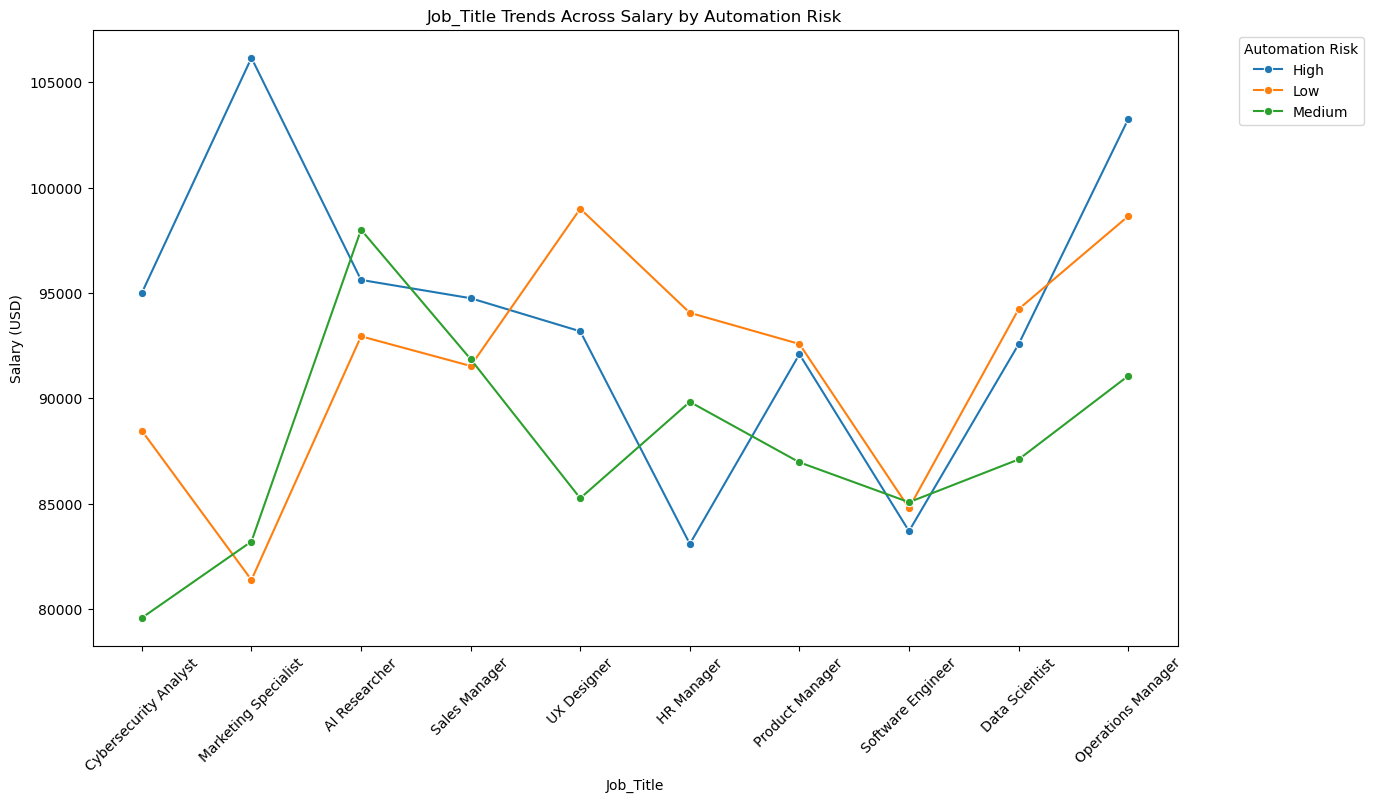

In [32]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Job_Title', y='Salary_USD', hue='Automation_Risk', marker='o', ci=None)
plt.title('Job_Title Trends Across Salary by Automation Risk')
plt.xlabel('Job_Title')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.legend(title='Automation Risk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

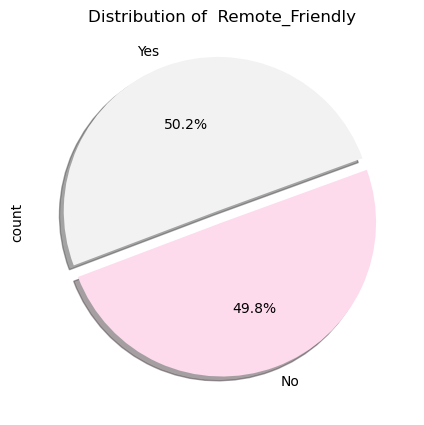

In [33]:
colors = plt.get_cmap('Pastel1_r').colors
df["Remote_Friendly"].value_counts().plot(kind='pie', startangle=20 ,autopct='%1.1f%%', figsize=(5,5), title='Distribution of  Remote_Friendly', explode=(0.08,0 ) , shadow=True , colors=colors)
plt.show()

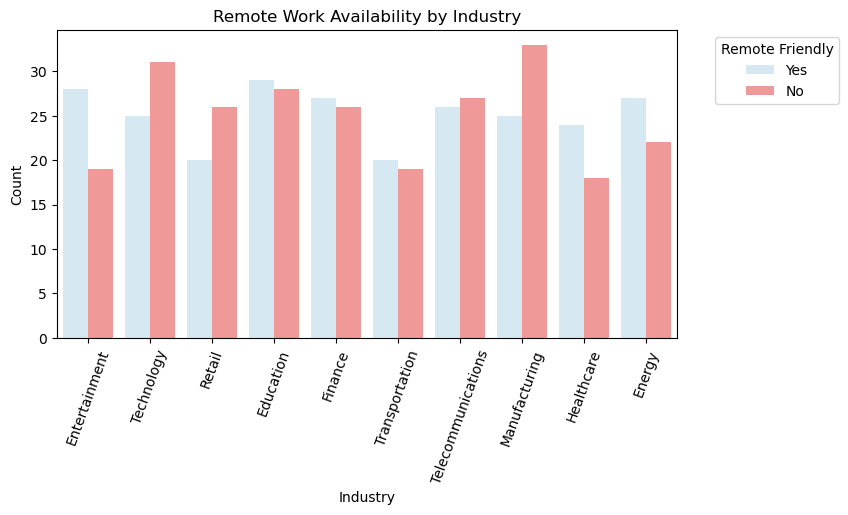

In [34]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Industry', hue='Remote_Friendly', palette={"#FF8A8A" ,"#D1E9F6"})
plt.title('Remote Work Availability by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.legend(title='Remote Friendly', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

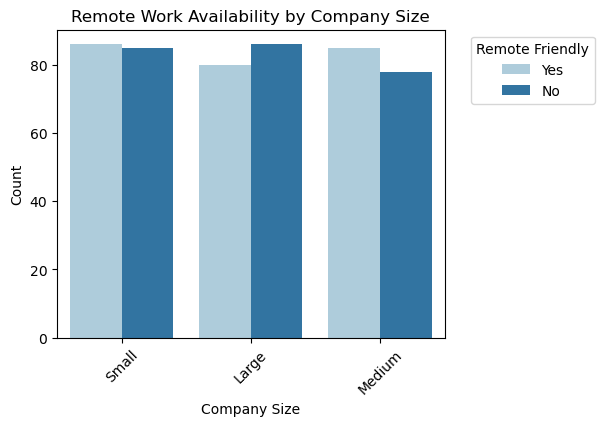

In [36]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Company_Size', hue='Remote_Friendly', palette='Paired')
plt.title('Remote Work Availability by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Remote Friendly', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

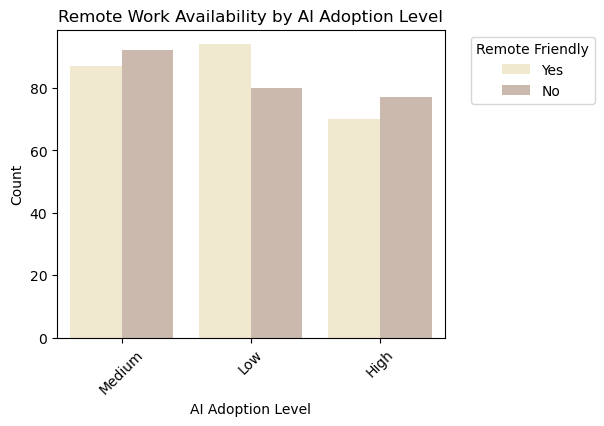

In [37]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='AI_Adoption_Level', hue='Remote_Friendly', palette={"#F6EACB" ,"#D0B8A8"})
plt.title('Remote Work Availability by AI Adoption Level')
plt.xlabel('AI Adoption Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Remote Friendly', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

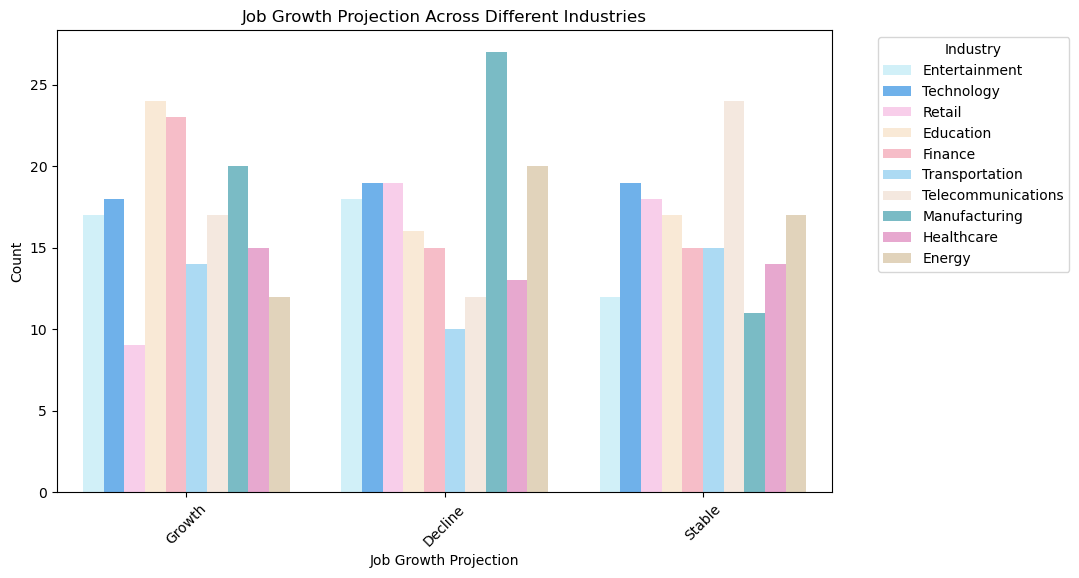

In [38]:
colors = ["#CAF4FF", "#5AB2FF","#FFC7ED" ,"#FFE9D0" ,"#FFB4C2","#A0DEFF" ,"#F7E7DC" ,"#6DC5D1" ,"#F19ED2","#E7D4B5"]

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Job_Growth_Projection', hue='Industry', palette=colors)
plt.title('Job Growth Projection Across Different Industries')
plt.xlabel('Job Growth Projection')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

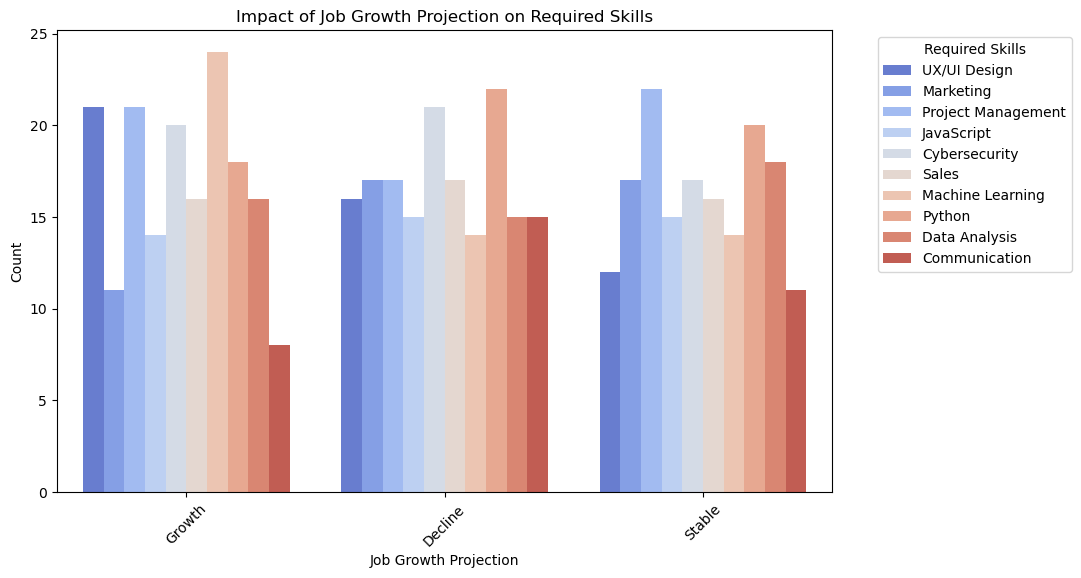

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Job_Growth_Projection', hue='Required_Skills', palette='coolwarm')
plt.title('Impact of Job Growth Projection on Required Skills')
plt.xlabel('Job Growth Projection')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Required Skills', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()